# Importing Libraries

In [19]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [20]:
df_rv = pd.read_csv('../datasets/bgg-19m-reviews.csv')
df_bg = pd.read_csv('../datasets/games-cleaned.csv')

df_rv.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


# Data Cleaning & EDA (Reviews)

In [21]:
df_rv.shape

(18964807, 6)

ตัดรีวิวที่ `name` ไม่ได้อยู่ใน `df_bg`  และรีวิวที่ไม่มี `user`

In [22]:
df_rv = df_rv[df_rv['name'].isin(df_bg['name'])]
df_rv = df_rv[df_rv['user'] == df_rv['user']]
df_rv = df_rv[['user', 'name', 'rating', 'comment']]

df_rv.shape

(15217681, 4)

In [23]:
df_rv['rating'].describe()

count    1.521768e+07
mean     7.285726e+00
std      1.469725e+00
min      1.401300e-45
25%      6.500000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

ตัดรีวิวที่ `rating` น้อยกว่า 1

In [24]:
df_rv = df_rv[df_rv['rating']>=1]
df_rv['rating'].describe()

count    1.521768e+07
mean     7.285727e+00
std      1.469722e+00
min      1.000000e+00
25%      6.500000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [25]:
not_comment = df_rv.isna().sum().sort_values(ascending=False)[0]

d = {"doesn't comment": not_comment, 'comment': df_rv.shape[0]-not_comment}    
ser_comment = pd.Series(data=d, index=["doesn't comment", 'comment'])
ser_comment

doesn't comment    12730094
comment             2487584
dtype: int64

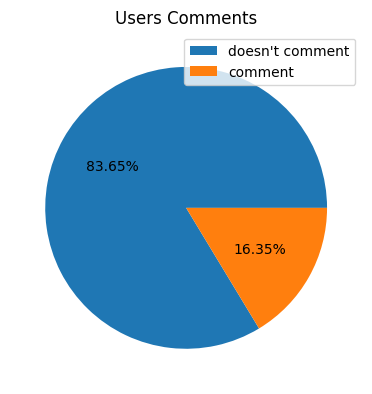

In [26]:
plt.figure(figsize=(10,6))
plt.title('Users Comments')
plt.pie(ser_comment, autopct='%.2f%%')
plt.legend(ser_comment.index)
plt.show()

มีรีวิวที่ `comment` เพียง 16.35% จากรีวิวทั้งหมด (2.5 ล้านรีวิวจาก 15 ล้านรีวิว)

ตัดรีวิวที่ `user` คนเดิมรีวิวเกมเดิมหลายครั้ง โดยแทนที่ด้วยค่าเฉลี่ย

In [27]:
df_rv = df_rv.groupby(['user', 'name'], as_index=False).mean()
df_rv.head()

,user,name,rating
0,Fu_Koios,Shadowrift,9.0
1,beastvol,Candamir: The First Settlers,5.0
2,beastvol,Catan,8.0
3,beastvol,Catan Card Game,7.0
4,beastvol,Caylus,9.0


In [28]:
cv = df_rv['user'].value_counts()
cv.describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99,1])

count    384533.000000
mean         39.539384
std          83.839438
min           1.000000
25%           3.000000
50%          12.000000
75%          39.000000
90%         101.000000
95%         169.000000
99%         409.000000
100%       3399.000000
max        3399.000000
Name: user, dtype: float64

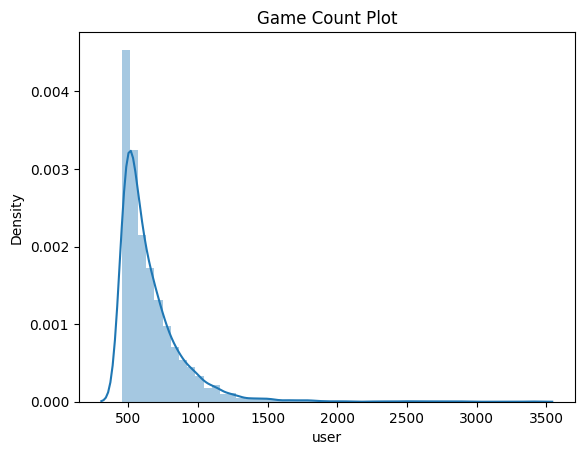

In [36]:
plt.title('Game Count Plot')
sns.distplot(cv)
plt.show()

`user` จำนวนมาก (99%) ที่ให้คะแนนเกมน้อยกว่า 400 เกม

ตัด `user` ที่มีการให้คะแนนน้อยกว่า 450 เกม

In [37]:
df_rv = df_rv[df_rv['user'].isin(cv[cv >= 450].index)]
cv = df_rv['user'].value_counts()
df_rv.shape

(2018715, 3)

In [38]:
df_rv.head()

,user,name,rating
5382,1 Family Meeple,10 Days in Europe,4.1
5383,1 Family Meeple,12 Days,7.0
5384,1 Family Meeple,7 Wonders,6.5
5385,1 Family Meeple,A Column of Fire,5.0
5386,1 Family Meeple,A Feast for Odin,10.0


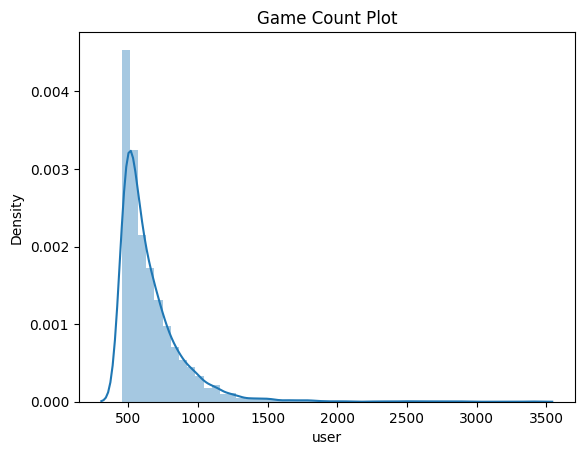

In [39]:
plt.title('Game Count Plot')
sns.distplot(cv)
plt.show()

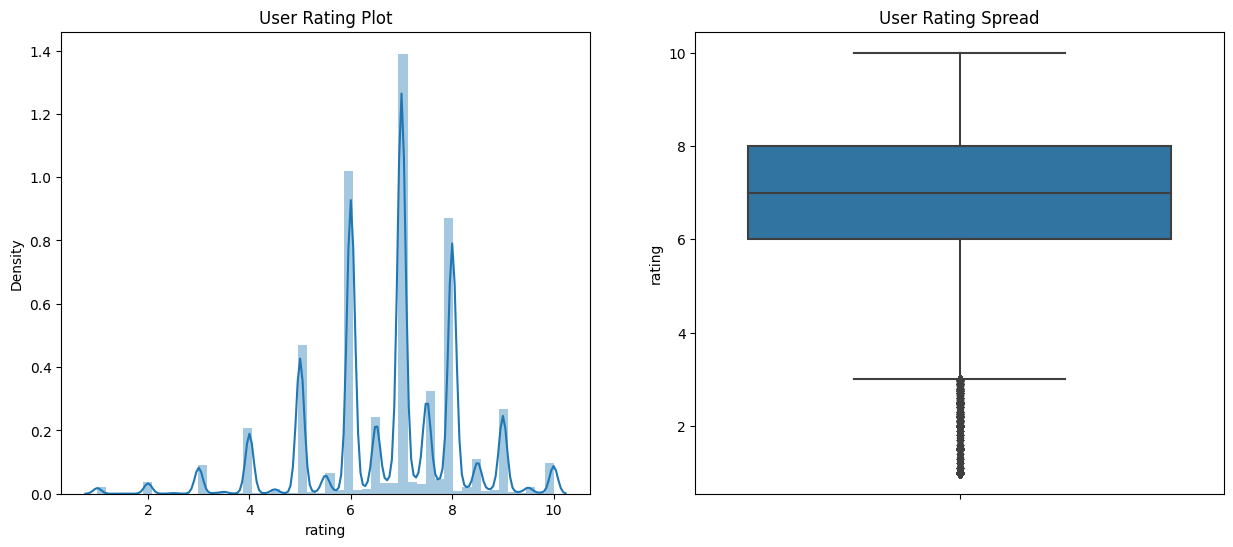

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('User Rating Plot')
sns.distplot(df_rv['rating'])


plt.subplot(1,2,2)
plt.title("User Rating Spread")
sns.boxplot(y=df_rv['rating'])
plt.show()

ผู้ใช้ส่วนใหญ่ให้คะแนนไม่ถึง 1000 เกมและให้ `rating` ที่ 6-8

# Save clean data to CSV

In [41]:
# df_rv.to_csv('reviews-cleaned.csv', index=False)